# Redes Multicapa para Regresión

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from functions3 import *

In [3]:
# import data from csv
data = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP2/datasets/Student_Performance_DEV.csv').drop(columns='idx')
data

,forecasted_performance,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities
0,6.326605,6.560017,5.043475,4.958906,4,False
1,7.774666,6.459315,3.529156,9.601236,5,False
2,7.343601,6.487913,2.500939,6.390868,4,False
3,1.851852,10.126572,2.311390,4.000000,5,False
4,3.607081,8.093355,3.419712,4.857238,9,False
...,...,...,...,...,...,...
1395,5.010497,6.481511,2.531747,4.598361,3,False
1396,6.280722,6.056482,5.997887,4.408789,8,False
1397,5.492269,5.402522,5.867482,4.000000,5,False
1398,7.002018,6.425094,5.027055,5.284618,6,False


### a)
Implementar una red neuronal multicapa, que funcione para cualquier valor $L \ge 1$, y $M^{(l)} \ge 1$, así como el algoritmo de optimización de descenso por gradiente y backpropagation para optimizar los pesos de las unidades ocultas, asumiendo una “loss-function” que sea la suma de los errores cuadráticos.

In [4]:
data = one_hot_encoding(data, 'extracurricular_activities')
train_data, test_data = train_test_split(data, test_size=0.2, seed=42)

X_train = train_data.drop(columns=['forecasted_performance'])
y_train = train_data['forecasted_performance'].values

X_test = test_data.drop(columns=['forecasted_performance'])
y_test = test_data['forecasted_performance'].values

X_train

,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities_False,extracurricular_activities_True
0,7.512345,5.072058,8.775325,14,0,1
1,7.645378,5.266626,8.351701,6,0,1
2,7.096499,3.071855,8.498025,2,0,1
3,6.454375,3.299192,9.913947,9,1,0
4,7.731830,2.091205,4.052463,17,1,0
...,...,...,...,...,...,...
1115,8.401831,5.314130,4.808138,16,1,0
1116,6.644282,4.947815,5.392057,2,1,0
1117,7.629650,4.989611,6.980204,9,1,0
1118,8.681235,5.776701,8.484583,9,1,0


In [5]:
nn = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 50, 1], activations=['relu', 'linear'], verbose=True)

# Fit the MLP model to the training data
train_losses, test_losses = nn.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=500, 
                                    mini_batch_size=64, 
                                    alpha=1e-5)


b.shape: (6, 1)
W.shape: (6, 6)


  0%|          | 1/500 [00:00<01:24,  5.91it/s]

  0%|          | 2/500 [00:00<01:05,  7.65it/s]

Epoch 0: Train loss: 26310.304406657, Test loss: 654.299721503175
Epoch 1: Train loss: 16616.545071439148, Test loss: 284.3926524464913
Epoch 2: Train loss: 1911.6575559134042, Test loss: 185.75660677992454


  1%|          | 6/500 [00:00<00:40, 12.30it/s]

Epoch 3: Train loss: 3734.879464063519, Test loss: 141.9425307918632
Epoch 4: Train loss: 1546.7227588823341, Test loss: 120.2394943892882
Epoch 5: Train loss: 1019.0897468086603, Test loss: 104.92456303408136


  2%|▏         | 8/500 [00:00<00:37, 13.11it/s]

Epoch 6: Train loss: 1438.0935892393757, Test loss: 94.55591773210452
Epoch 7: Train loss: 2198.2025822125056, Test loss: 86.2680425047947
Epoch 8: Train loss: 1460.4223510071795, Test loss: 79.58879171803794


  2%|▏         | 12/500 [00:00<00:34, 14.06it/s]

Epoch 9: Train loss: 1448.3193663792688, Test loss: 74.23098638335536
Epoch 10: Train loss: 1027.0423271807097, Test loss: 69.60682425362975
Epoch 11: Train loss: 1191.6606165520739, Test loss: 65.50379231379458


  3%|▎         | 16/500 [00:01<00:32, 14.78it/s]

Epoch 12: Train loss: 844.0186669738592, Test loss: 61.73059055956264
Epoch 13: Train loss: 986.7582428164125, Test loss: 58.31807732879023
Epoch 14: Train loss: 509.79048632045766, Test loss: 55.1361295334467
Epoch 15: Train loss: 1034.048157376119, Test loss: 52.18048874035655


  4%|▍         | 20/500 [00:01<00:32, 14.85it/s]

Epoch 16: Train loss: 596.4683735143223, Test loss: 49.55047128533772
Epoch 17: Train loss: 689.0239777535476, Test loss: 47.1288849944611
Epoch 18: Train loss: 890.1342957723091, Test loss: 44.924121178845816
Epoch 19: Train loss: 719.9348334587769, Test loss: 42.837855941345914


  5%|▍         | 24/500 [00:01<00:32, 14.85it/s]

Epoch 20: Train loss: 1541.9361450957185, Test loss: 40.82129617865732
Epoch 21: Train loss: 656.7234480494028, Test loss: 39.113429230378145
Epoch 22: Train loss: 451.455301250294, Test loss: 37.512307894644096
Epoch 23: Train loss: 368.704770524456, Test loss: 36.030195748215725


  5%|▌         | 26/500 [00:01<00:31, 14.86it/s]

Epoch 24: Train loss: 286.3728964018481, Test loss: 34.59828170565893
Epoch 25: Train loss: 395.69075957022216, Test loss: 33.272828100594786
Epoch 26: Train loss: 460.7188017271886, Test loss: 31.992141947201194


  6%|▌         | 28/500 [00:02<00:31, 14.75it/s]

Epoch 27: Train loss: 531.1745267248122, Test loss: 30.747307249465713
Epoch 28: Train loss: 475.6134445604633, Test loss: 29.600982497086477


  6%|▋         | 32/500 [00:02<00:40, 11.69it/s]

Epoch 29: Train loss: 596.4048195356892, Test loss: 28.528053564814225
Epoch 30: Train loss: 514.6984511465653, Test loss: 27.516666270822373
Epoch 31: Train loss: 402.1339967438907, Test loss: 26.583920783288505


  7%|▋         | 36/500 [00:02<00:35, 13.21it/s]

Epoch 32: Train loss: 349.05461404828344, Test loss: 25.706676678628643
Epoch 33: Train loss: 303.28678003481025, Test loss: 24.85275709600074
Epoch 34: Train loss: 427.4699243880549, Test loss: 24.05177542742238
Epoch 35: Train loss: 549.446999391231, Test loss: 23.2765545683094


  8%|▊         | 40/500 [00:02<00:32, 14.13it/s]

Epoch 36: Train loss: 1982.1104284965802, Test loss: 22.418929523355313
Epoch 37: Train loss: 1220.0307672633319, Test loss: 21.658271180792443
Epoch 38: Train loss: 264.4469056252969, Test loss: 20.994970249234232
Epoch 39: Train loss: 282.1768877509685, Test loss: 20.37748241349862


  9%|▉         | 44/500 [00:03<00:31, 14.66it/s]

Epoch 40: Train loss: 200.85870935680103, Test loss: 19.79604429326879
Epoch 41: Train loss: 185.16017944147373, Test loss: 19.246637839428622
Epoch 42: Train loss: 150.5875443921922, Test loss: 18.729535466798996
Epoch 43: Train loss: 263.0794551923803, Test loss: 18.237366640740355


 10%|▉         | 48/500 [00:03<00:30, 15.00it/s]

Epoch 44: Train loss: 169.8657935314036, Test loss: 17.773323179081068
Epoch 45: Train loss: 586.6144124690668, Test loss: 17.317418636563893
Epoch 46: Train loss: 631.487524105976, Test loss: 16.86833682384268
Epoch 47: Train loss: 210.4413871492578, Test loss: 16.46525559838106


 10%|█         | 52/500 [00:03<00:29, 15.24it/s]

Epoch 48: Train loss: 117.65812264848539, Test loss: 16.075645100758294
Epoch 49: Train loss: 249.70742079159808, Test loss: 15.689715284324475
Epoch 50: Train loss: 194.13222233931884, Test loss: 15.319876495583097
Epoch 51: Train loss: 158.2790860883872, Test loss: 14.973258147837821


 11%|█         | 56/500 [00:04<00:28, 15.36it/s]

Epoch 52: Train loss: 459.28049279998635, Test loss: 14.635815723694531
Epoch 53: Train loss: 173.71987968982071, Test loss: 14.318871505157057
Epoch 54: Train loss: 163.05597915398658, Test loss: 14.029068006482225
Epoch 55: Train loss: 192.51012709663647, Test loss: 13.739715714952071


 12%|█▏        | 60/500 [00:04<00:28, 15.41it/s]

Epoch 56: Train loss: 280.4283619982645, Test loss: 13.460074541105282
Epoch 57: Train loss: 73.81723700299803, Test loss: 13.198094532471169
Epoch 58: Train loss: 162.61882638253718, Test loss: 12.967522171701795
Epoch 59: Train loss: 146.2692424644102, Test loss: 12.746557848164462


 13%|█▎        | 64/500 [00:04<00:28, 15.41it/s]

Epoch 60: Train loss: 175.38823543640973, Test loss: 12.533842757721516
Epoch 61: Train loss: 168.71094570346875, Test loss: 12.330706655811273
Epoch 62: Train loss: 89.71705047189626, Test loss: 12.139292923806535
Epoch 63: Train loss: 145.2956159128944, Test loss: 11.955071003672131


 14%|█▎        | 68/500 [00:04<00:28, 15.37it/s]

Epoch 64: Train loss: 764.0015830704968, Test loss: 11.7489343561276
Epoch 65: Train loss: 99.9729118065114, Test loss: 11.578439486534817
Epoch 66: Train loss: 175.92057864856318, Test loss: 11.413744944254661
Epoch 67: Train loss: 177.00014633012924, Test loss: 11.259177962185422


 14%|█▍        | 70/500 [00:04<00:27, 15.38it/s]

Epoch 68: Train loss: 144.57981671096758, Test loss: 11.111443997884981
Epoch 69: Train loss: 202.39190913115212, Test loss: 10.967208905666316
Epoch 70: Train loss: 336.92713529191457, Test loss: 10.827606236074024


 15%|█▍        | 74/500 [00:05<00:31, 13.57it/s]

Epoch 71: Train loss: 286.5841842216525, Test loss: 10.693282524614975
Epoch 72: Train loss: 251.9727294584116, Test loss: 10.562785519093575
Epoch 73: Train loss: 300.6371503551421, Test loss: 10.439022860389162
Epoch 74: Train loss: 641.5936592453903, Test loss: 10.313696117516717


 16%|█▌        | 78/500 [00:05<00:29, 14.43it/s]

Epoch 75: Train loss: 144.44888896434205, Test loss: 10.213901196367098
Epoch 76: Train loss: 154.89831973342078, Test loss: 10.117900569876113
Epoch 77: Train loss: 167.2956547160926, Test loss: 10.022748818069214
Epoch 78: Train loss: 91.00958478065708, Test loss: 9.931382465354927


 16%|█▋        | 82/500 [00:05<00:28, 14.84it/s]

Epoch 79: Train loss: 114.74375520459171, Test loss: 9.84062419012953
Epoch 80: Train loss: 127.31447745137145, Test loss: 9.754070583654235
Epoch 81: Train loss: 163.6850568251839, Test loss: 9.669682760371241
Epoch 82: Train loss: 431.0260027703134, Test loss: 9.5879415477216


 17%|█▋        | 86/500 [00:06<00:27, 15.15it/s]

Epoch 83: Train loss: 231.26700108514382, Test loss: 9.506604593983486
Epoch 84: Train loss: 138.62591822516774, Test loss: 9.42599995677673
Epoch 85: Train loss: 482.56991710861206, Test loss: 9.349601968761455
Epoch 86: Train loss: 120.73472804517696, Test loss: 9.274814506695755


 18%|█▊        | 90/500 [00:06<00:26, 15.33it/s]

Epoch 87: Train loss: 195.6046819813026, Test loss: 9.200549456788698
Epoch 88: Train loss: 135.83377109213077, Test loss: 9.132506719528307
Epoch 89: Train loss: 159.911352767613, Test loss: 9.063675961535768
Epoch 90: Train loss: 572.7980173159102, Test loss: 8.993833782663778


 19%|█▉        | 94/500 [00:06<00:26, 15.39it/s]

Epoch 91: Train loss: 160.6029790082342, Test loss: 8.93020714271299
Epoch 92: Train loss: 103.72792354823174, Test loss: 8.867675816951973
Epoch 93: Train loss: 139.69820722722682, Test loss: 8.807853947788171
Epoch 94: Train loss: 119.1892329191911, Test loss: 8.748002673404624


 20%|█▉        | 98/500 [00:06<00:26, 15.42it/s]

Epoch 95: Train loss: 106.07220934804634, Test loss: 8.690632060364745
Epoch 96: Train loss: 141.8352762568761, Test loss: 8.63438379415416
Epoch 97: Train loss: 96.09047206285443, Test loss: 8.579640225624924
Epoch 98: Train loss: 107.03390700951755, Test loss: 8.526261713697442


 20%|██        | 102/500 [00:07<00:25, 15.47it/s]

Epoch 99: Train loss: 77.51104747925274, Test loss: 8.473590436936485
Epoch 100: Train loss: 136.0967908196658, Test loss: 8.422363213634199
Epoch 101: Train loss: 100.88652086346164, Test loss: 8.372704362394936
Epoch 102: Train loss: 391.36720976594415, Test loss: 8.321357208734023


 21%|██        | 106/500 [00:07<00:25, 15.49it/s]

Epoch 103: Train loss: 127.3407032388161, Test loss: 8.275023473617884
Epoch 104: Train loss: 178.27584126036132, Test loss: 8.229172101153603
Epoch 105: Train loss: 193.91359958879087, Test loss: 8.179464745786795
Epoch 106: Train loss: 118.58390142560373, Test loss: 8.133759382503454


 22%|██▏       | 110/500 [00:07<00:25, 15.47it/s]

Epoch 107: Train loss: 145.42500229374028, Test loss: 8.088526802890835
Epoch 108: Train loss: 83.15312243326034, Test loss: 8.044967358045426
Epoch 109: Train loss: 102.89523256521008, Test loss: 8.002027888764111
Epoch 110: Train loss: 74.243941632442, Test loss: 7.958460109098769


 23%|██▎       | 114/500 [00:07<00:26, 14.56it/s]

Epoch 111: Train loss: 146.23077089261687, Test loss: 7.916283644067328
Epoch 112: Train loss: 148.43048981287586, Test loss: 7.873542875723762
Epoch 113: Train loss: 81.50827081675422, Test loss: 7.830885081249899


 24%|██▎       | 118/500 [00:08<00:25, 15.02it/s]

Epoch 114: Train loss: 176.72710525939274, Test loss: 7.788573478030064
Epoch 115: Train loss: 97.57547350002207, Test loss: 7.74906324918315
Epoch 116: Train loss: 124.24912499393214, Test loss: 7.710246332102768
Epoch 117: Train loss: 111.93443339617966, Test loss: 7.6700909505843695


 24%|██▍       | 122/500 [00:08<00:24, 15.22it/s]

Epoch 118: Train loss: 122.1893571211522, Test loss: 7.632044519903744
Epoch 119: Train loss: 275.4881039623622, Test loss: 7.593781998406944
Epoch 120: Train loss: 122.17475204304287, Test loss: 7.557383419393151
Epoch 121: Train loss: 107.73405026698097, Test loss: 7.521689125953815


 25%|██▌       | 126/500 [00:08<00:24, 15.36it/s]

Epoch 122: Train loss: 171.4963226958518, Test loss: 7.486595841275255
Epoch 123: Train loss: 134.93672628283363, Test loss: 7.452296716156991
Epoch 124: Train loss: 102.00689355276982, Test loss: 7.419976678677192
Epoch 125: Train loss: 173.58371519261334, Test loss: 7.387336270329674


 26%|██▌       | 130/500 [00:08<00:24, 15.40it/s]

Epoch 126: Train loss: 78.86474689353149, Test loss: 7.354275476799242
Epoch 127: Train loss: 123.64979628395344, Test loss: 7.3217654712895
Epoch 128: Train loss: 97.46559889964878, Test loss: 7.291579537753722
Epoch 129: Train loss: 333.49937688212935, Test loss: 7.245509500720229


 27%|██▋       | 134/500 [00:09<00:23, 15.38it/s]

Epoch 130: Train loss: 153.66485845662322, Test loss: 7.213953690448285
Epoch 131: Train loss: 77.31478085324619, Test loss: 7.184994398318408
Epoch 132: Train loss: 169.69511457208003, Test loss: 7.156740214900343
Epoch 133: Train loss: 138.4893914517674, Test loss: 7.1265431791623906


 28%|██▊       | 138/500 [00:09<00:23, 15.38it/s]

Epoch 134: Train loss: 140.47584611218394, Test loss: 7.098482803703352
Epoch 135: Train loss: 313.06956161562493, Test loss: 7.070011359525167
Epoch 136: Train loss: 118.83810194992918, Test loss: 7.041766591704667
Epoch 137: Train loss: 127.04290626509507, Test loss: 7.016759106327404


 28%|██▊       | 142/500 [00:09<00:23, 15.43it/s]

Epoch 138: Train loss: 139.08316202532367, Test loss: 6.9879958923619325
Epoch 139: Train loss: 92.84557972132555, Test loss: 6.961528136600934
Epoch 140: Train loss: 166.31425430850555, Test loss: 6.936696133476158
Epoch 141: Train loss: 322.2789134419269, Test loss: 6.909363394448463


 29%|██▉       | 146/500 [00:09<00:22, 15.41it/s]

Epoch 142: Train loss: 111.9794655480088, Test loss: 6.883467725171528
Epoch 143: Train loss: 178.7779206307208, Test loss: 6.8597205990538
Epoch 144: Train loss: 390.5593877568297, Test loss: 6.834653905837442
Epoch 145: Train loss: 90.61015411168451, Test loss: 6.812165833114949


 30%|███       | 150/500 [00:10<00:22, 15.43it/s]

Epoch 146: Train loss: 101.23287467578754, Test loss: 6.789341058761547
Epoch 147: Train loss: 154.48609678294983, Test loss: 6.767200977760889
Epoch 148: Train loss: 92.36697116855431, Test loss: 6.745507528441114
Epoch 149: Train loss: 184.68886612467315, Test loss: 6.724499901083377


 30%|███       | 152/500 [00:10<00:23, 14.65it/s]

Epoch 150: Train loss: 112.98058021859836, Test loss: 6.69799193828921
Epoch 151: Train loss: 98.83019176447671, Test loss: 6.675369968463985
Epoch 152: Train loss: 121.695527330916, Test loss: 6.652994210663349


 31%|███       | 156/500 [00:10<00:23, 14.91it/s]

Epoch 153: Train loss: 95.36029563361276, Test loss: 6.631804578192018
Epoch 154: Train loss: 137.64263718491407, Test loss: 6.610015317490459
Epoch 155: Train loss: 93.10473474139896, Test loss: 6.589051126012507
Epoch 156: Train loss: 90.78630930401653, Test loss: 6.570038742789912


 32%|███▏      | 160/500 [00:10<00:22, 15.16it/s]

Epoch 157: Train loss: 148.3640348623574, Test loss: 6.551574179773646
Epoch 158: Train loss: 127.19481442247836, Test loss: 6.526617307973661
Epoch 159: Train loss: 366.8300797250149, Test loss: 6.510471002755635


 32%|███▏      | 162/500 [00:11<00:26, 12.94it/s]

Epoch 160: Train loss: 116.25276495229545, Test loss: 6.491578110252846
Epoch 161: Train loss: 151.39242843373364, Test loss: 6.4688177073938
Epoch 162: Train loss: 127.47219857609902, Test loss: 6.450741064073618


 33%|███▎      | 166/500 [00:11<00:23, 14.03it/s]

Epoch 163: Train loss: 106.56459190373273, Test loss: 6.4321681887658935
Epoch 164: Train loss: 83.25261722176005, Test loss: 6.414501622509635
Epoch 165: Train loss: 116.24702580243442, Test loss: 6.397043111965864
Epoch 166: Train loss: 179.9358357686669, Test loss: 6.381431322573922


 34%|███▍      | 170/500 [00:11<00:22, 14.70it/s]

Epoch 167: Train loss: 90.82190970995651, Test loss: 6.363100633064718
Epoch 168: Train loss: 110.79066648192202, Test loss: 6.343147172546513
Epoch 169: Train loss: 123.8825659595452, Test loss: 6.326147493961199


 35%|███▍      | 174/500 [00:11<00:22, 14.18it/s]

Epoch 170: Train loss: 106.88941065046477, Test loss: 6.309075021821268
Epoch 171: Train loss: 119.60046934739297, Test loss: 6.292613950669228
Epoch 172: Train loss: 69.12230619020579, Test loss: 6.276180800124787
Epoch 173: Train loss: 140.5158314907238, Test loss: 6.26160551275425


 36%|███▌      | 178/500 [00:12<00:21, 14.81it/s]

Epoch 174: Train loss: 103.99782619225522, Test loss: 6.2451163662391584
Epoch 175: Train loss: 118.41538715690723, Test loss: 6.228920309766175
Epoch 176: Train loss: 126.66272403452652, Test loss: 6.212441162369356
Epoch 177: Train loss: 208.01634824675654, Test loss: 6.189862223040001


 36%|███▋      | 182/500 [00:12<00:21, 15.11it/s]

Epoch 178: Train loss: 124.97154896760237, Test loss: 6.175529769481113
Epoch 179: Train loss: 255.07649760169758, Test loss: 6.159980392395472
Epoch 180: Train loss: 133.22653141420335, Test loss: 6.144934202605625
Epoch 181: Train loss: 127.15724627714833, Test loss: 6.131090323539982


 37%|███▋      | 184/500 [00:12<00:20, 15.20it/s]

Epoch 182: Train loss: 90.55523284320991, Test loss: 6.1163863584152285
Epoch 183: Train loss: 298.58811029468734, Test loss: 6.100981080520311
Epoch 184: Train loss: 118.9274393822525, Test loss: 6.086326043669076


 38%|███▊      | 188/500 [00:12<00:22, 14.14it/s]

Epoch 185: Train loss: 226.39149083283715, Test loss: 6.0724370967293995
Epoch 186: Train loss: 85.67748034530693, Test loss: 6.05981025035211
Epoch 187: Train loss: 223.06475472397958, Test loss: 6.038931479163799
Epoch 188: Train loss: 86.41179319421978, Test loss: 6.025347968443545


 38%|███▊      | 192/500 [00:13<00:20, 14.77it/s]

Epoch 189: Train loss: 109.01788968352719, Test loss: 6.0120681364918305
Epoch 190: Train loss: 154.9526779690406, Test loss: 6.0004606464651955
Epoch 191: Train loss: 100.3402660103017, Test loss: 5.988578965631609
Epoch 192: Train loss: 114.13644185290319, Test loss: 5.974048042224358


 39%|███▉      | 196/500 [00:13<00:20, 14.92it/s]

Epoch 193: Train loss: 68.36744317421797, Test loss: 5.962076332919437
Epoch 194: Train loss: 160.31280481506053, Test loss: 5.950670302796187
Epoch 195: Train loss: 116.0295437209328, Test loss: 5.939811797299153
Epoch 196: Train loss: 106.83054406071331, Test loss: 5.92638319593823


 40%|████      | 200/500 [00:13<00:19, 15.17it/s]

Epoch 197: Train loss: 122.88788238250774, Test loss: 5.913613125957663
Epoch 198: Train loss: 76.17560498922897, Test loss: 5.902525305848769
Epoch 199: Train loss: 134.35278331873147, Test loss: 5.890501150793874
Epoch 200: Train loss: 114.78573827472866, Test loss: 5.878947106781677


 41%|████      | 204/500 [00:13<00:19, 15.31it/s]

Epoch 201: Train loss: 223.8466521589634, Test loss: 5.866784569021627
Epoch 202: Train loss: 95.1171629857398, Test loss: 5.85509218160538
Epoch 203: Train loss: 75.14720781767986, Test loss: 5.844090793869797
Epoch 204: Train loss: 263.9223342232934, Test loss: 5.832948491600251


 42%|████▏     | 208/500 [00:14<00:18, 15.43it/s]

Epoch 205: Train loss: 138.30932348373472, Test loss: 5.821437627319455
Epoch 206: Train loss: 93.75961922071576, Test loss: 5.810738579707204
Epoch 207: Train loss: 167.88494027168548, Test loss: 5.8001147396586
Epoch 208: Train loss: 120.26001086178927, Test loss: 5.7877671507297705


 42%|████▏     | 212/500 [00:14<00:19, 15.08it/s]

Epoch 209: Train loss: 151.73716282957585, Test loss: 5.777400659039053
Epoch 210: Train loss: 107.67299659666672, Test loss: 5.768919455957621
Epoch 211: Train loss: 138.72694647881238, Test loss: 5.756972351719104


 43%|████▎     | 216/500 [00:14<00:18, 15.28it/s]

Epoch 212: Train loss: 117.50711889268845, Test loss: 5.74701479758599
Epoch 213: Train loss: 161.12580085198303, Test loss: 5.736766539349862
Epoch 214: Train loss: 103.01923179667602, Test loss: 5.728481243663791
Epoch 215: Train loss: 127.91854139651335, Test loss: 5.719152290001477


 44%|████▍     | 220/500 [00:14<00:18, 15.38it/s]

Epoch 216: Train loss: 161.13664690457358, Test loss: 5.708764499437425
Epoch 217: Train loss: 119.76928849748803, Test loss: 5.697041597114038
Epoch 218: Train loss: 104.02038914166731, Test loss: 5.688527218428665
Epoch 219: Train loss: 95.06272829151291, Test loss: 5.677759505061031


 45%|████▍     | 224/500 [00:15<00:17, 15.40it/s]

Epoch 220: Train loss: 94.42144073737039, Test loss: 5.66618207034111
Epoch 221: Train loss: 150.89424963619663, Test loss: 5.6561402557997225
Epoch 222: Train loss: 125.35730569653295, Test loss: 5.646759688814354
Epoch 223: Train loss: 149.40010005596588, Test loss: 5.6373168798386555


 45%|████▌     | 226/500 [00:15<00:20, 13.68it/s]

Epoch 224: Train loss: 94.14703264659131, Test loss: 5.628610451384035
Epoch 225: Train loss: 160.0585569192868, Test loss: 5.61957622831454
Epoch 226: Train loss: 97.98578375485792, Test loss: 5.610148009333177


 46%|████▋     | 232/500 [00:15<00:18, 14.81it/s]

Epoch 227: Train loss: 117.14408234798753, Test loss: 5.60154218552204
Epoch 228: Train loss: 69.13313839399765, Test loss: 5.59277941910638
Epoch 229: Train loss: 63.65267806152886, Test loss: 5.584243215823666
Epoch 230: Train loss: 158.34016596679137, Test loss: 5.574475962745388
Epoch 231: Train loss: 174.05576296117957, Test loss: 5.565450093927926


 47%|████▋     | 236/500 [00:16<00:17, 15.13it/s]

Epoch 232: Train loss: 134.89633555248082, Test loss: 5.556592186512964
Epoch 233: Train loss: 114.51894425268826, Test loss: 5.54839561190762
Epoch 234: Train loss: 206.36025612010084, Test loss: 5.540428256205397
Epoch 235: Train loss: 62.651998027257235, Test loss: 5.53132203204011


 48%|████▊     | 240/500 [00:16<00:16, 15.30it/s]

Epoch 236: Train loss: 95.616226817691, Test loss: 5.521637889222092
Epoch 237: Train loss: 108.54302341287955, Test loss: 5.514854240842685
Epoch 238: Train loss: 131.78818498065678, Test loss: 5.506001924184352
Epoch 239: Train loss: 143.1315540886538, Test loss: 5.498082344002127


 49%|████▉     | 244/500 [00:16<00:16, 15.36it/s]

Epoch 240: Train loss: 82.34699675803344, Test loss: 5.489983826281143
Epoch 241: Train loss: 80.51299584412693, Test loss: 5.480251803520594
Epoch 242: Train loss: 103.60679286557897, Test loss: 5.474737804466353
Epoch 243: Train loss: 132.60424520892062, Test loss: 5.467011636407283


 50%|████▉     | 248/500 [00:16<00:16, 15.42it/s]

Epoch 244: Train loss: 68.62257329400823, Test loss: 5.461033623144086
Epoch 245: Train loss: 124.80190429006907, Test loss: 5.4514760202270205
Epoch 246: Train loss: 116.24534685271226, Test loss: 5.44211152888857
Epoch 247: Train loss: 163.59594204054804, Test loss: 5.433511157977716


 50%|█████     | 252/500 [00:17<00:16, 15.42it/s]

Epoch 248: Train loss: 107.0067174929336, Test loss: 5.425808929000929
Epoch 249: Train loss: 87.25472311920569, Test loss: 5.418424663694101
Epoch 250: Train loss: 122.12543576756407, Test loss: 5.410873482379203
Epoch 251: Train loss: 118.00855654377445, Test loss: 5.404174980272567


 51%|█████     | 256/500 [00:17<00:15, 15.37it/s]

Epoch 252: Train loss: 130.5162241540894, Test loss: 5.398879643869942
Epoch 253: Train loss: 141.60260375784256, Test loss: 5.391063942263817
Epoch 254: Train loss: 117.66999143374103, Test loss: 5.382965168211963
Epoch 255: Train loss: 107.35966984770273, Test loss: 5.376570546721095


 52%|█████▏    | 260/500 [00:17<00:15, 15.38it/s]

Epoch 256: Train loss: 114.02803223692604, Test loss: 5.3701763128009805
Epoch 257: Train loss: 95.06420500922475, Test loss: 5.362513759822253
Epoch 258: Train loss: 96.03877491761486, Test loss: 5.357232431873127
Epoch 259: Train loss: 141.0848229547221, Test loss: 5.349150953797012


 52%|█████▏    | 262/500 [00:17<00:15, 15.34it/s]

Epoch 260: Train loss: 90.42875049630368, Test loss: 5.342150965905267
Epoch 261: Train loss: 110.69615103764463, Test loss: 5.336277077474693
Epoch 262: Train loss: 198.5589486501516, Test loss: 5.3290040729241195


 53%|█████▎    | 266/500 [00:18<00:16, 14.61it/s]

Epoch 263: Train loss: 120.7377618083426, Test loss: 5.321038977976284
Epoch 264: Train loss: 96.80994261629273, Test loss: 5.316057814901669
Epoch 265: Train loss: 125.1464922106225, Test loss: 5.308098049790987
Epoch 266: Train loss: 105.81937701617758, Test loss: 5.302871583623657


 54%|█████▍    | 270/500 [00:18<00:15, 15.04it/s]

Epoch 267: Train loss: 195.21522361966208, Test loss: 5.29801120140361
Epoch 268: Train loss: 117.88133711368545, Test loss: 5.29090479368169
Epoch 269: Train loss: 100.21914802303812, Test loss: 5.283080504515449
Epoch 270: Train loss: 91.6907548196908, Test loss: 5.276279506714732


 55%|█████▍    | 274/500 [00:18<00:14, 15.24it/s]

Epoch 271: Train loss: 86.82233923736693, Test loss: 5.270599224753133
Epoch 272: Train loss: 202.61292877026378, Test loss: 5.261988845453945
Epoch 273: Train loss: 97.1207582620168, Test loss: 5.256027512243531
Epoch 274: Train loss: 132.30081186725448, Test loss: 5.250355533858993


 56%|█████▌    | 278/500 [00:18<00:14, 15.32it/s]

Epoch 275: Train loss: 136.66109568057274, Test loss: 5.244499465792175
Epoch 276: Train loss: 131.91575439205047, Test loss: 5.237919718420642
Epoch 277: Train loss: 84.78768191380745, Test loss: 5.233099738551098
Epoch 278: Train loss: 135.79584147658258, Test loss: 5.226409069765103


 56%|█████▋    | 282/500 [00:19<00:14, 15.38it/s]

Epoch 279: Train loss: 142.98086168468464, Test loss: 5.220776639133819
Epoch 280: Train loss: 114.27958261011763, Test loss: 5.215034833764817
Epoch 281: Train loss: 85.54089098158744, Test loss: 5.208584734168918
Epoch 282: Train loss: 81.16085609185028, Test loss: 5.20310874510279


 57%|█████▋    | 286/500 [00:19<00:13, 15.42it/s]

Epoch 283: Train loss: 124.1277120597381, Test loss: 5.19721023951449
Epoch 284: Train loss: 104.01632906374277, Test loss: 5.192807447343035
Epoch 285: Train loss: 104.58479745849255, Test loss: 5.187464471131468
Epoch 286: Train loss: 129.87779937300158, Test loss: 5.183039820365379


 58%|█████▊    | 290/500 [00:19<00:13, 15.43it/s]

Epoch 287: Train loss: 115.21163502837534, Test loss: 5.180720303028129
Epoch 288: Train loss: 108.73771542703045, Test loss: 5.1707295028404
Epoch 289: Train loss: 103.20999423617742, Test loss: 5.1653549565347205
Epoch 290: Train loss: 95.27347923639536, Test loss: 5.160050560971458


 59%|█████▉    | 294/500 [00:19<00:13, 15.42it/s]

Epoch 291: Train loss: 99.93127591414634, Test loss: 5.154096759931291
Epoch 292: Train loss: 132.76028101342368, Test loss: 5.148151148764606
Epoch 293: Train loss: 93.42388749521393, Test loss: 5.14311369279341
Epoch 294: Train loss: 109.7833683844596, Test loss: 5.139122012709592


 60%|█████▉    | 298/500 [00:20<00:13, 15.41it/s]

Epoch 295: Train loss: 110.46215102502502, Test loss: 5.134217694523595
Epoch 296: Train loss: 98.7746062039232, Test loss: 5.127885865695501
Epoch 297: Train loss: 88.6942183414565, Test loss: 5.122289199285368
Epoch 298: Train loss: 92.80168692745183, Test loss: 5.117318820251552


 60%|██████    | 302/500 [00:20<00:13, 14.47it/s]

Epoch 299: Train loss: 97.69485810671274, Test loss: 5.112414915409171
Epoch 300: Train loss: 191.97303854295856, Test loss: 5.108691432597686
Epoch 301: Train loss: 118.54990571485449, Test loss: 5.103985285958084


 61%|██████    | 306/500 [00:20<00:13, 14.89it/s]

Epoch 302: Train loss: 119.63311661509306, Test loss: 5.101513835578879
Epoch 303: Train loss: 100.69404464584287, Test loss: 5.09554854309046
Epoch 304: Train loss: 90.8433144722501, Test loss: 5.092519789431371
Epoch 305: Train loss: 124.06337391489012, Test loss: 5.082514255244134


 62%|██████▏   | 310/500 [00:20<00:12, 15.15it/s]

Epoch 306: Train loss: 118.55328869201814, Test loss: 5.078366980708772
Epoch 307: Train loss: 104.62745763135726, Test loss: 5.074394574539647
Epoch 308: Train loss: 167.52089572550517, Test loss: 5.068821645399287
Epoch 309: Train loss: 101.75413549371302, Test loss: 5.064191790325469


 63%|██████▎   | 314/500 [00:21<00:12, 15.28it/s]

Epoch 310: Train loss: 127.27421106525246, Test loss: 5.061761081477804
Epoch 311: Train loss: 121.48175703314789, Test loss: 5.054030620868086
Epoch 312: Train loss: 122.48240779780367, Test loss: 5.049827321849839
Epoch 313: Train loss: 71.63211867859819, Test loss: 5.046095843101234


 64%|██████▎   | 318/500 [00:21<00:11, 15.35it/s]

Epoch 314: Train loss: 126.65400802043263, Test loss: 5.041901801800502
Epoch 315: Train loss: 124.6207032155701, Test loss: 5.035039636804286
Epoch 316: Train loss: 84.49921274862359, Test loss: 5.031458661051368
Epoch 317: Train loss: 108.98309410300897, Test loss: 5.024538071101596


 64%|██████▍   | 322/500 [00:21<00:11, 15.37it/s]

Epoch 318: Train loss: 107.19950165970343, Test loss: 5.021782153574594
Epoch 319: Train loss: 114.27410607466953, Test loss: 5.017018827802057
Epoch 320: Train loss: 83.92986412530404, Test loss: 5.012349659954821
Epoch 321: Train loss: 108.08427589928061, Test loss: 5.00939007929


 65%|██████▍   | 324/500 [00:21<00:11, 15.36it/s]

Epoch 322: Train loss: 104.49557272389728, Test loss: 5.008254368511481
Epoch 323: Train loss: 73.23211521471396, Test loss: 5.004047042478443
Epoch 324: Train loss: 111.08161714810373, Test loss: 4.99606151489354


 66%|██████▌   | 328/500 [00:22<00:11, 14.59it/s]

Epoch 325: Train loss: 128.56664641613364, Test loss: 4.990495934275377
Epoch 326: Train loss: 134.22971217321165, Test loss: 4.988056080455148
Epoch 327: Train loss: 85.98194791541948, Test loss: 4.985052476155047
Epoch 328: Train loss: 173.13653944647345, Test loss: 4.97877349616239


 66%|██████▋   | 332/500 [00:22<00:11, 14.99it/s]

Epoch 329: Train loss: 126.27561895120104, Test loss: 4.97339008359481
Epoch 330: Train loss: 97.90149024413441, Test loss: 4.968653366226875
Epoch 331: Train loss: 76.64840912789396, Test loss: 4.964372892089809
Epoch 332: Train loss: 112.97453751401216, Test loss: 4.961846757954665


 67%|██████▋   | 334/500 [00:22<00:11, 14.97it/s]

Epoch 333: Train loss: 89.07186833522643, Test loss: 4.956901530175311
Epoch 334: Train loss: 154.64644780758715, Test loss: 4.952753983092489
Epoch 335: Train loss: 181.18889274269057, Test loss: 4.947931331269528


 68%|██████▊   | 338/500 [00:22<00:11, 13.62it/s]

Epoch 336: Train loss: 109.75291106563712, Test loss: 4.944927667606144
Epoch 337: Train loss: 70.08926124732002, Test loss: 4.941621378040581
Epoch 338: Train loss: 117.62202017972233, Test loss: 4.935777502112221


 68%|██████▊   | 342/500 [00:23<00:10, 14.47it/s]

Epoch 339: Train loss: 196.48075272532262, Test loss: 4.931307828812308
Epoch 340: Train loss: 119.96240711759324, Test loss: 4.9283736205631845
Epoch 341: Train loss: 100.47917546294916, Test loss: 4.925241112412423
Epoch 342: Train loss: 115.48792883661339, Test loss: 4.920411050781604


 69%|██████▉   | 346/500 [00:23<00:10, 14.82it/s]

Epoch 343: Train loss: 119.1343973405173, Test loss: 4.9179739453093365
Epoch 344: Train loss: 94.66555972937012, Test loss: 4.914054041994221
Epoch 345: Train loss: 139.75399420667404, Test loss: 4.913716912592467
Epoch 346: Train loss: 122.03788529841827, Test loss: 4.906638789124957


 70%|███████   | 350/500 [00:23<00:09, 15.10it/s]

Epoch 347: Train loss: 123.99646758664242, Test loss: 4.9030010878955865
Epoch 348: Train loss: 99.94398654258698, Test loss: 4.899669830319909
Epoch 349: Train loss: 153.50575332721453, Test loss: 4.895441511185241
Epoch 350: Train loss: 107.96099542307732, Test loss: 4.892897152800065


 71%|███████   | 354/500 [00:23<00:09, 15.26it/s]

Epoch 351: Train loss: 116.98440594834243, Test loss: 4.888175033960185
Epoch 352: Train loss: 112.39482547825939, Test loss: 4.8854157131508105
Epoch 353: Train loss: 131.21709237505743, Test loss: 4.880939338046057
Epoch 354: Train loss: 166.62247014497984, Test loss: 4.877820722934296


 72%|███████▏  | 358/500 [00:24<00:09, 15.33it/s]

Epoch 355: Train loss: 86.50438091487004, Test loss: 4.875987925889844
Epoch 356: Train loss: 56.02831507129614, Test loss: 4.873061278583788
Epoch 357: Train loss: 116.52758369256101, Test loss: 4.869353316393024
Epoch 358: Train loss: 111.70394857627417, Test loss: 4.866232106883635


 72%|███████▏  | 362/500 [00:24<00:08, 15.36it/s]

Epoch 359: Train loss: 104.41062735852975, Test loss: 4.862406161912404
Epoch 360: Train loss: 88.61303186560436, Test loss: 4.859205806414162
Epoch 361: Train loss: 133.5822311299644, Test loss: 4.8594351038152395
Epoch 362: Train loss: 126.98279064373277, Test loss: 4.853738786447695


 73%|███████▎  | 366/500 [00:24<00:08, 15.39it/s]

Epoch 363: Train loss: 93.26702853981463, Test loss: 4.851927051553284
Epoch 364: Train loss: 128.27005525795636, Test loss: 4.850887635767794
Epoch 365: Train loss: 82.63875124656616, Test loss: 4.846279089202437
Epoch 366: Train loss: 119.0769402701701, Test loss: 4.842283738503633


 74%|███████▍  | 370/500 [00:24<00:09, 13.88it/s]

Epoch 367: Train loss: 69.97465792139825, Test loss: 4.838813591328532
Epoch 368: Train loss: 120.38734676361847, Test loss: 4.836885280854133
Epoch 369: Train loss: 138.27272589805355, Test loss: 4.832637085437493


 75%|███████▍  | 374/500 [00:25<00:08, 14.55it/s]

Epoch 370: Train loss: 125.99306762390862, Test loss: 4.829456484712203
Epoch 371: Train loss: 118.51159246857492, Test loss: 4.825701688370327
Epoch 372: Train loss: 158.236559163066, Test loss: 4.822865075656395
Epoch 373: Train loss: 106.15081832893001, Test loss: 4.819919292242363


 76%|███████▌  | 378/500 [00:25<00:08, 14.96it/s]

Epoch 374: Train loss: 101.24156651542137, Test loss: 4.81725322095411
Epoch 375: Train loss: 158.64629433107515, Test loss: 4.81368215445858
Epoch 376: Train loss: 114.67371936093903, Test loss: 4.813862658904113
Epoch 377: Train loss: 96.12540017692689, Test loss: 4.8078132743517195


 76%|███████▋  | 382/500 [00:25<00:07, 15.17it/s]

Epoch 378: Train loss: 111.12873474435726, Test loss: 4.807507954529612
Epoch 379: Train loss: 134.5266825762806, Test loss: 4.802473052593767
Epoch 380: Train loss: 87.47996980193408, Test loss: 4.80075477164259
Epoch 381: Train loss: 89.84396075641527, Test loss: 4.796972852215538


 77%|███████▋  | 386/500 [00:26<00:07, 15.30it/s]

Epoch 382: Train loss: 117.03669911126141, Test loss: 4.795289494804406
Epoch 383: Train loss: 129.05558192387076, Test loss: 4.792207943160297
Epoch 384: Train loss: 209.25254906809445, Test loss: 4.789399629747966
Epoch 385: Train loss: 137.00738743087257, Test loss: 4.788483172997775


 78%|███████▊  | 390/500 [00:26<00:07, 15.37it/s]

Epoch 386: Train loss: 93.11328498075488, Test loss: 4.784296354277516
Epoch 387: Train loss: 112.61138941236356, Test loss: 4.780968014246804
Epoch 388: Train loss: 120.1982877179448, Test loss: 4.778402301617372
Epoch 389: Train loss: 91.32466284315913, Test loss: 4.775975844999288


 79%|███████▉  | 394/500 [00:26<00:06, 15.39it/s]

Epoch 390: Train loss: 103.93792465031098, Test loss: 4.773729078645786
Epoch 391: Train loss: 107.45868851022357, Test loss: 4.771158958987261
Epoch 392: Train loss: 91.67854900206073, Test loss: 4.7686733616316745
Epoch 393: Train loss: 90.2496073213447, Test loss: 4.767359913376716


 80%|███████▉  | 398/500 [00:26<00:06, 15.39it/s]

Epoch 394: Train loss: 178.6302608687108, Test loss: 4.763650260419017
Epoch 395: Train loss: 142.51941977632563, Test loss: 4.760827567945173
Epoch 396: Train loss: 105.57568144771254, Test loss: 4.7574915039319245
Epoch 397: Train loss: 75.66609453739987, Test loss: 4.756862640200328


 80%|████████  | 402/500 [00:27<00:06, 15.42it/s]

Epoch 398: Train loss: 101.62311686100165, Test loss: 4.75254608812586
Epoch 399: Train loss: 128.44874117836278, Test loss: 4.750416066016055
Epoch 400: Train loss: 77.28150174851714, Test loss: 4.749185347955165
Epoch 401: Train loss: 131.15823060671673, Test loss: 4.74864802586486


 81%|████████  | 404/500 [00:27<00:06, 15.40it/s]

Epoch 402: Train loss: 106.14582875478848, Test loss: 4.745235048914461
Epoch 403: Train loss: 122.89838365536735, Test loss: 4.741560150971227
Epoch 404: Train loss: 120.80100561047233, Test loss: 4.737914085122745


 82%|████████▏ | 408/500 [00:27<00:06, 13.91it/s]

Epoch 405: Train loss: 122.87917784103337, Test loss: 4.73491160324607
Epoch 406: Train loss: 103.21199537298186, Test loss: 4.73286574969919
Epoch 407: Train loss: 150.02607976584582, Test loss: 4.7303358951950765
Epoch 408: Train loss: 121.50408408013587, Test loss: 4.727197754168915


 82%|████████▏ | 412/500 [00:27<00:06, 14.64it/s]

Epoch 409: Train loss: 173.0698303108163, Test loss: 4.724894582683897
Epoch 410: Train loss: 131.62645285662379, Test loss: 4.722634799295236
Epoch 411: Train loss: 103.57029390392894, Test loss: 4.719466158311497
Epoch 412: Train loss: 79.17116056169016, Test loss: 4.716909764064159


 83%|████████▎ | 416/500 [00:28<00:05, 15.01it/s]

Epoch 413: Train loss: 108.42446728841927, Test loss: 4.715035999003508
Epoch 414: Train loss: 112.29792929362566, Test loss: 4.713205621702483
Epoch 415: Train loss: 110.23687360564766, Test loss: 4.711740111386005
Epoch 416: Train loss: 125.68164775937241, Test loss: 4.710617746200681


 84%|████████▍ | 420/500 [00:28<00:05, 15.20it/s]

Epoch 417: Train loss: 84.22261896771042, Test loss: 4.7087882928003495
Epoch 418: Train loss: 126.99237728472328, Test loss: 4.706033407009362
Epoch 419: Train loss: 102.45667707398593, Test loss: 4.702818369124064
Epoch 420: Train loss: 133.64576713574317, Test loss: 4.697939000723181


 85%|████████▍ | 424/500 [00:28<00:04, 15.28it/s]

Epoch 421: Train loss: 131.81194556533143, Test loss: 4.695791721824674
Epoch 422: Train loss: 143.63024223048677, Test loss: 4.693633495688527
Epoch 423: Train loss: 124.34973127689365, Test loss: 4.691410460749815
Epoch 424: Train loss: 133.10890009029305, Test loss: 4.689912709951495


 86%|████████▌ | 428/500 [00:28<00:04, 15.35it/s]

Epoch 425: Train loss: 134.58631149683524, Test loss: 4.688712553187014
Epoch 426: Train loss: 118.53747166504108, Test loss: 4.687202848448845
Epoch 427: Train loss: 101.11571042784652, Test loss: 4.68328793554504
Epoch 428: Train loss: 127.33308701149511, Test loss: 4.681495034492538


 86%|████████▋ | 432/500 [00:29<00:04, 15.36it/s]

Epoch 429: Train loss: 113.91958053237349, Test loss: 4.679533044833032
Epoch 430: Train loss: 119.92394659193943, Test loss: 4.677759512317394
Epoch 431: Train loss: 128.35861637853844, Test loss: 4.6793419391739315
Epoch 432: Train loss: 115.12649022915096, Test loss: 4.675287661730619


 87%|████████▋ | 436/500 [00:29<00:04, 15.40it/s]

Epoch 433: Train loss: 112.10863162762497, Test loss: 4.673151393247937
Epoch 434: Train loss: 139.54918919478396, Test loss: 4.673086352585062
Epoch 435: Train loss: 119.74766535588441, Test loss: 4.668379058909886
Epoch 436: Train loss: 98.03569638660679, Test loss: 4.665474933338708


 88%|████████▊ | 440/500 [00:29<00:03, 15.37it/s]

Epoch 437: Train loss: 128.77118398088393, Test loss: 4.663058564806131
Epoch 438: Train loss: 100.6114355844798, Test loss: 4.66209342833285
Epoch 439: Train loss: 124.00123113309738, Test loss: 4.6596889371357
Epoch 440: Train loss: 131.19680754925213, Test loss: 4.657916207033094


 89%|████████▉ | 444/500 [00:29<00:04, 13.63it/s]

Epoch 441: Train loss: 119.50650154455751, Test loss: 4.655086435087158
Epoch 442: Train loss: 105.35043589956837, Test loss: 4.652992650200895
Epoch 443: Train loss: 156.03250547496117, Test loss: 4.649829907086507


 90%|████████▉ | 448/500 [00:30<00:03, 14.38it/s]

Epoch 444: Train loss: 142.06153867499188, Test loss: 4.648063373672445
Epoch 445: Train loss: 109.19438671076462, Test loss: 4.64878113786531
Epoch 446: Train loss: 137.4569457655013, Test loss: 4.643968697976006
Epoch 447: Train loss: 64.65283298714259, Test loss: 4.642165206437152


 90%|█████████ | 452/500 [00:30<00:03, 14.86it/s]

Epoch 448: Train loss: 104.07746685194255, Test loss: 4.640996127020594
Epoch 449: Train loss: 80.8884933537291, Test loss: 4.640244259292308
Epoch 450: Train loss: 113.1048323614442, Test loss: 4.63809694467974
Epoch 451: Train loss: 100.42667155298723, Test loss: 4.634864160105455


 91%|█████████ | 456/500 [00:30<00:02, 15.10it/s]

Epoch 452: Train loss: 146.22334178410603, Test loss: 4.632895727114956
Epoch 453: Train loss: 150.49067512828435, Test loss: 4.63105226332469
Epoch 454: Train loss: 159.83021133397855, Test loss: 4.629260432357043
Epoch 455: Train loss: 147.81516856781738, Test loss: 4.6265648895850395


 92%|█████████▏| 460/500 [00:30<00:02, 15.28it/s]

Epoch 456: Train loss: 112.65803036339351, Test loss: 4.624530590408007
Epoch 457: Train loss: 167.453056031026, Test loss: 4.623394721959304
Epoch 458: Train loss: 136.57779019247113, Test loss: 4.62091753589285
Epoch 459: Train loss: 89.22235171656104, Test loss: 4.62016798643529


 93%|█████████▎| 464/500 [00:31<00:02, 15.37it/s]

Epoch 460: Train loss: 110.30476483200627, Test loss: 4.617344184047758
Epoch 461: Train loss: 92.70760817055377, Test loss: 4.614798098400789
Epoch 462: Train loss: 96.29986476741041, Test loss: 4.612920581813814
Epoch 463: Train loss: 119.95365234667669, Test loss: 4.6113127631420125


 94%|█████████▎| 468/500 [00:31<00:02, 15.38it/s]

Epoch 464: Train loss: 105.55959652030916, Test loss: 4.609408920570099
Epoch 465: Train loss: 134.06301499996573, Test loss: 4.608912350389003
Epoch 466: Train loss: 129.26147104804622, Test loss: 4.6083037758248695
Epoch 467: Train loss: 129.26901334556632, Test loss: 4.6038024025291335


 94%|█████████▍| 470/500 [00:31<00:01, 15.35it/s]

Epoch 468: Train loss: 124.43744804742936, Test loss: 4.603276860132702
Epoch 469: Train loss: 91.99815615268105, Test loss: 4.600601579297102
Epoch 470: Train loss: 103.79296962883988, Test loss: 4.599992630130446


 95%|█████████▍| 474/500 [00:31<00:01, 14.71it/s]

Epoch 471: Train loss: 76.40942899914917, Test loss: 4.598181348061981
Epoch 472: Train loss: 92.86507942988804, Test loss: 4.5950627517672755
Epoch 473: Train loss: 161.0216734036357, Test loss: 4.5932354339345665
Epoch 474: Train loss: 93.14553274456304, Test loss: 4.590987439295735


 96%|█████████▌| 478/500 [00:32<00:01, 13.36it/s]

Epoch 475: Train loss: 109.59756413225847, Test loss: 4.589391643993609
Epoch 476: Train loss: 107.8643571270983, Test loss: 4.589070423193894
Epoch 477: Train loss: 109.81288208682184, Test loss: 4.585864344765589


 96%|█████████▋| 482/500 [00:32<00:01, 14.25it/s]

Epoch 478: Train loss: 135.5379204361456, Test loss: 4.5839847490696535
Epoch 479: Train loss: 102.50151520170876, Test loss: 4.581569222501013
Epoch 480: Train loss: 126.85485391555889, Test loss: 4.580452946006798
Epoch 481: Train loss: 110.18283991099351, Test loss: 4.578477123624316


 97%|█████████▋| 486/500 [00:32<00:00, 14.77it/s]

Epoch 482: Train loss: 127.65171199143295, Test loss: 4.575854944219671
Epoch 483: Train loss: 74.89063311554881, Test loss: 4.574392192694315
Epoch 484: Train loss: 124.85057387838475, Test loss: 4.573736055826976
Epoch 485: Train loss: 150.59684555666934, Test loss: 4.573208750070269


 98%|█████████▊| 490/500 [00:33<00:00, 15.10it/s]

Epoch 486: Train loss: 83.13194007997403, Test loss: 4.570969092241343
Epoch 487: Train loss: 119.05819936695497, Test loss: 4.569557112464738
Epoch 488: Train loss: 135.0001058418953, Test loss: 4.569686809180681
Epoch 489: Train loss: 103.41817563631236, Test loss: 4.565367708269446


 99%|█████████▉| 494/500 [00:33<00:00, 15.23it/s]

Epoch 490: Train loss: 128.44393359621958, Test loss: 4.564233490087157
Epoch 491: Train loss: 197.1644415125367, Test loss: 4.566524729063063
Epoch 492: Train loss: 136.96434430159033, Test loss: 4.561719714040499
Epoch 493: Train loss: 152.85572194369865, Test loss: 4.561066295000319


100%|█████████▉| 498/500 [00:33<00:00, 15.28it/s]

Epoch 494: Train loss: 108.31967273359608, Test loss: 4.560059193289782
Epoch 495: Train loss: 119.76791970165344, Test loss: 4.558628132116037
Epoch 496: Train loss: 132.51466193688194, Test loss: 4.555081095781096
Epoch 497: Train loss: 141.69326588847855, Test loss: 4.552316900461787


100%|██████████| 500/500 [00:33<00:00, 14.85it/s]

Epoch 498: Train loss: 111.75743000695435, Test loss: 4.55043489090529
Epoch 499: Train loss: 112.90170133093055, Test loss: 4.549273020650834


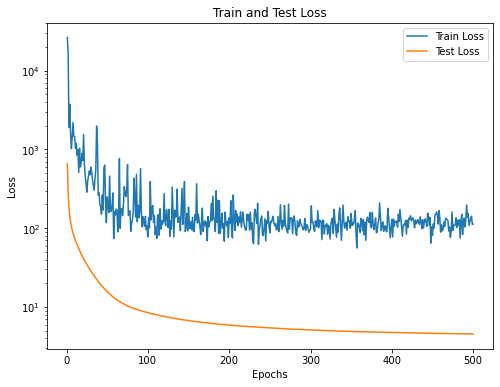

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()

In [9]:
predictions = nn.predict(X_test)

print("  Predictions  |   Test")
for i in range(len(predictions)):
    print(predictions[i], y_test[i])

X.shape: (280, 6)
X: 
 [[ 8.55108677  5.28900346  6.47087856  8.          0.          1.        ]
 [ 7.40955901  2.19223162  5.83208764  4.          0.          1.        ]
 [ 6.28946919  3.25448845  4.          7.          1.          0.        ]
 ...
 [ 8.43320614  2.69401173  8.55926968 14.          0.          1.        ]
 [ 6.0495974   3.58273148  7.96523693  4.          0.          1.        ]
 [ 8.30749849  5.05960638  4.79239682 18.          1.          0.        ]]
  Predictions  |   Test
[6.6211174] 9.678152468405315
[6.51047362] 7.337679311836268
[6.27138817] 4.542551445452206
[6.6959624] 4.408466887658554
[6.78538083] 6.5918391130432274
[6.42631992] 7.126303113365252
[6.17838731] 5.824865318066567
[6.35068506] 4.318271770712224
[6.44445586] 2.6946935959490674
[6.50400582] 4.621360632505932
[6.04839938] 6.289601307408167
[6.86575636] 6.659869395546703
[6.11376753] 8.050121380949898
[6.29052943] 1.851851851851852
[6.59642126] 7.629186838253545
[6.44509879] 3.628587783482679
[

### b)
Implementar descenso por gradiente estocástico y graficar la evolución del error de entrenamiento en función de las  épocas.

### c)
Implementar descenso por gradiente con mini-baches, y graficar la evolución del error de entrenamiento en función de las épocas, para distintos tamaños de baches. Deberáas elegir a tu criterio el tamaño de los mini-batches.

### d)
Implementar descenso por gradiente con mini-baches, y graficar la evolución del error de entrenamiento en función de las épocas, para distintos tamaños de baches. Deberás elegir a tu criterio el tamaño de los mini-batches.

**Sugerencia:** si bien uno puede hacer una búsqueda exhaustiva sobre el espacio de hiperparámetros $L$ y $M^{(l)}$, esto puede resultar computacionalmente demasiado costoso, debido a que para cada combinación y cada fold, se de debe re-entrenar el modelo y evaluarlo. Piense si hay alguna manera de recorrer el espacio de búsqueda con menor costo computacional. Además, recuerde que dados dos modelos de performance similar, se privilegia elegir el de menor complejidad (menor cantidad de parámetros), porque tenderá a tener menor varianza en el error predictivo sobre data sets “nuevos” (es decir, que no hayan sido usados para el deasrrollo del modelo).


### e)
Analizar la performance de su modelo final en términos de $RMSE$, $MAE$ y $R^2$, y graficar $\hat{y}$ vs. $y$ sobre los datos “held out” de los folds de cross-validaion. Compare esto con la performance del modelo de regresión lineal desarrollado en el problema anterior. ¿Cuál de los dos modelos cree usted que generalizará mejor? ¿Por qué?
